In [ ]:
# შემოვიტანოთ ყველა საჭირო მოდული
# მოცემულ დავალებაში საჭიროა კლასიფიკაცია

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# დატას ჩატვრითვა

In [4]:
sns.set_style("whitegrid")

df = pd.read_csv('diabetes.csv')

print( "დატას სტრუქტურა: ", df.shape)
# CSV ფაილის შედგება 768 ხაზისა და 9 სვეტისაგან

print("პირველი ხუთი ხაზი: ", df.head())
# გვაქვს 9 ფითჩერი, მათშორის ერთია Outcome (შედეგის) სვეტი, რომელიც არის ბაინერი და 
# ვიზუალიზაციისთვის არ გამოგვადგება.
# ამასთანავე, პირველივე ხაზებზე აშკარაა, რომ დაკარგული გვაქვს სხვადასხვა სვეტის 
# მნიშვნელობები და მოგვიწევს აღდგენა/ჩასწორება.

დატას სტრუქტურა:  (768, 9)
პირველი ხუთი ხაზი:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# ქვედა უჯრებში გავაანალიზოთ მონაცემები

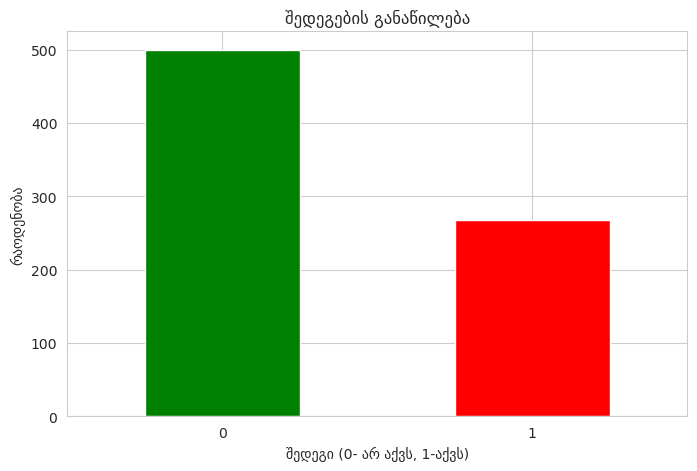

In [6]:
plt.figure(figsize=(8, 5))
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('შედეგების განაწილება')
plt.xlabel('შედეგი (0- არ აქვს, 1-აქვს)')
plt.ylabel('რაოდენობა')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# ზემოთ მოცემული ბარ ჩარტით ვხედავთ, რომ 500 პაციენტს არ დაუდგინდა დიაბეტი
# ხოლო დარჩენილ 268 პაციენტს - კი.

In [ ]:
# ქვემოთ მოცემული კოდით შეგვიძლია შევქმნათ ჰით მეპი, განვსაზღვროთ ურთიერთდამოკიდებულება
# ფიჩერებს შორის, რაც შემდეგში დაგვეხმარება ML მოდელის ჩამოყალიბებისას და სწორი
# ფიჩერის შერჩევისას.

# გრაფა გვიჩვენებს, რომ ყველაზე მაღალი ურთიერთკავშირი ფიქსირდება სხეულის მასის ინდექსსა
# და ტრიცეფსის კანის ნაკეცის სისქეს შორის.

# დიაბეტის ალბათობას ოჯახის ისტორიაზე დაყრდნობით არანაირ კავშირი არ აქვს
# დიასტოლურ არტერიულ წნევასთან

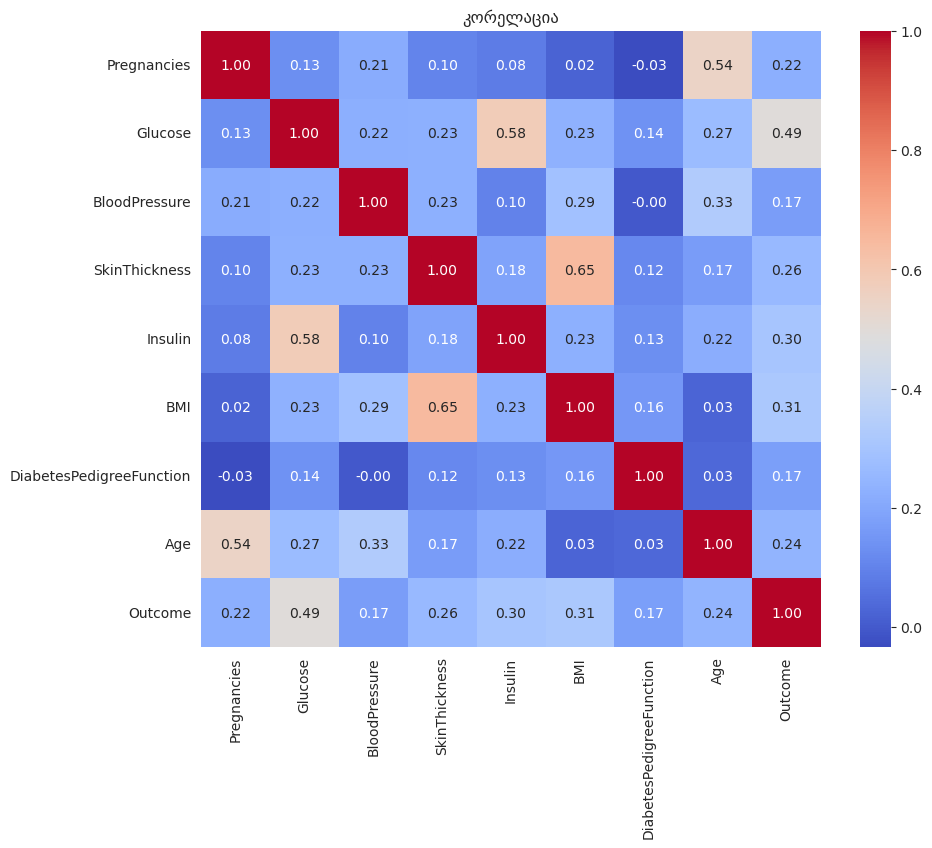

In [8]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f' )
plt.title('კორელაცია')
plt.show() 

In [ ]:
# ფიჩერების განაწილება
# ქვემოთ გავაკეთეთ ჰისტოგრამები, ყველა სვეტისთვის ცალ-ცალკე.
# თითოეული ჰისტოგრამა გვაწვდის ინფორმაციას რომელი მნიშვნელობა იყო ყველაზე ხშირი მათთვის.

# მაგალითად ჩვენ ვხედავთ, რომ მოცემული მონაცემები ძირითადად 20 დან 30 წლამდე ადამიანებისაა
# ასევე, უმეტესობას შედარებით დაბალი ინსულინის დონე აქვთ და ა.შ

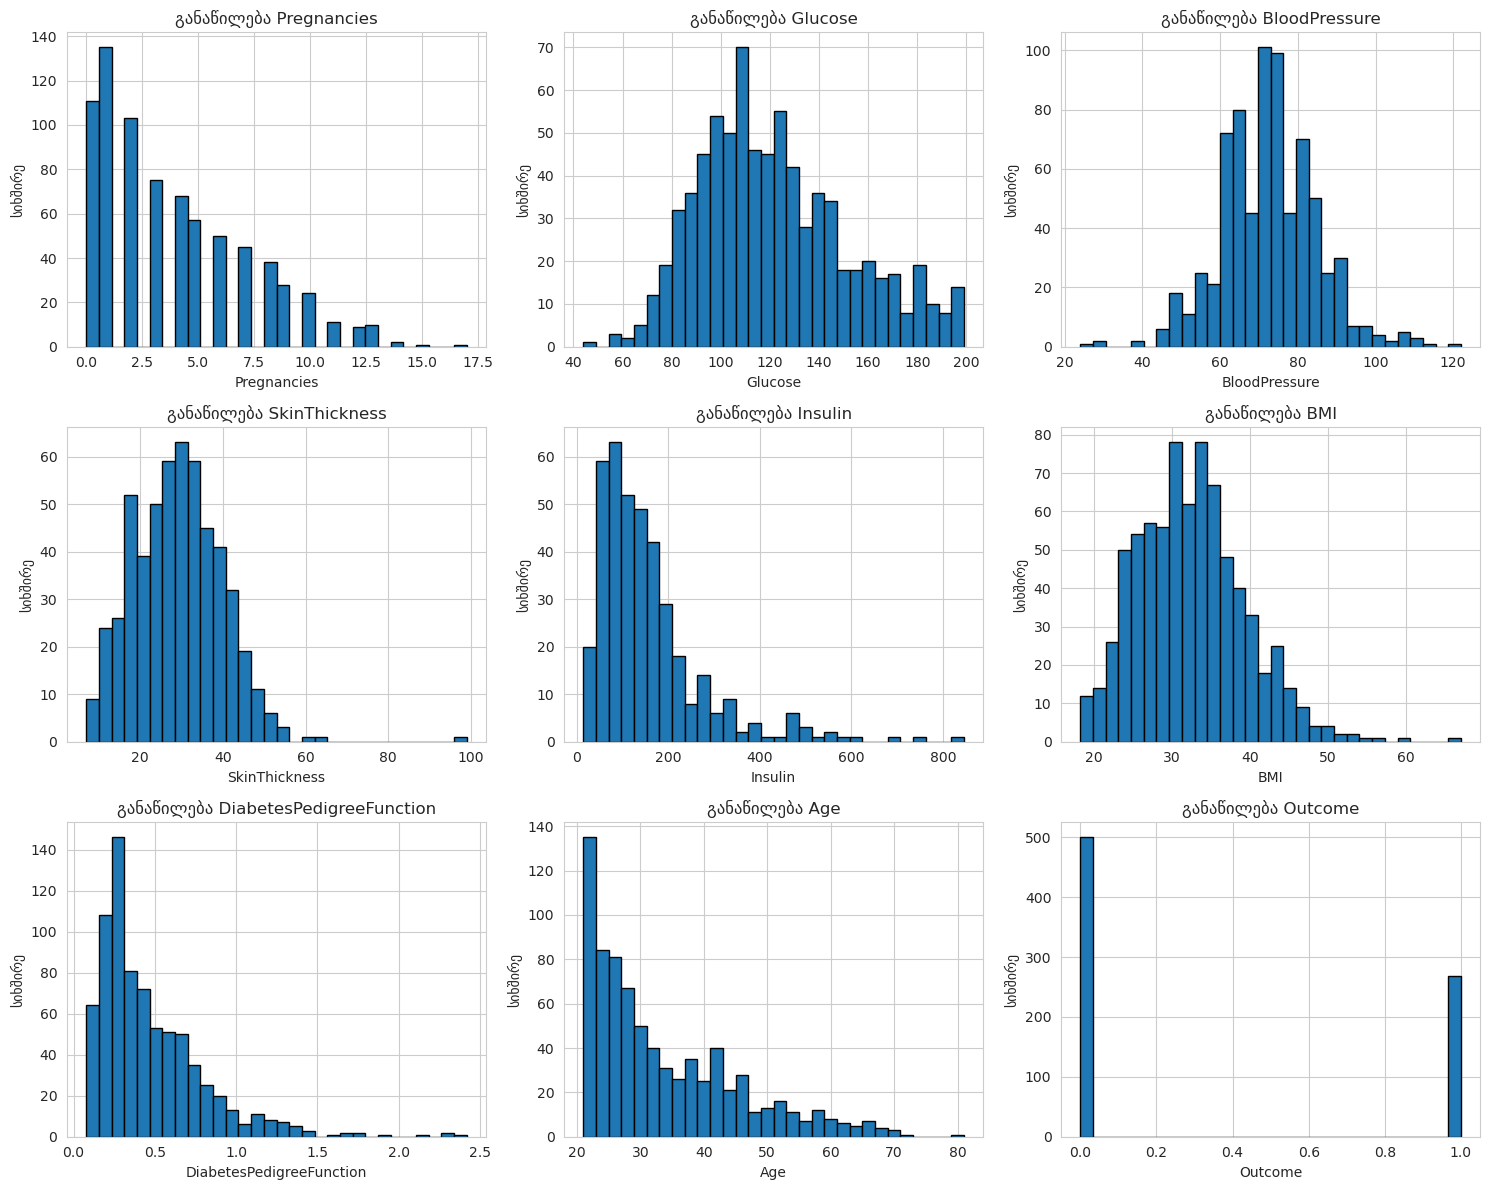

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12) )
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(f'განაწილება {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('სიხშირე')

plt.tight_layout()
plt.show()

In [ ]:
# ახლა საჭიროა შევამოწმოთ დატა და მოვძებნოთ დაკარგული მნიშვნელობები სვეტებში

In [23]:
print("დაკარგული მნიშვნელობები თითოეულ სვეტში:")
print(df.isnull().sum())



დაკარგული მნიშვნელობები თითოეულ სვეტში:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [24]:
# შევსება
df_filled = df.copy()

for col in df.columns[:-1]:
    if (df_filled[col].isnull().sum() > 0 ):
        median_value = df_filled[col].median()
        df_filled[col] = df_filled[col].fillna(median_value)
        print(f"სვეტი {col} ი შეივსო მედიანით: {median_value:.2f}")

print("\nშევსების შემდგომ ჩვენი შედეგია:")
print(df_filled.isnull().sum())

სვეტი Glucose ი შეივსო მედიანით: 117.00
სვეტი BloodPressure ი შეივსო მედიანით: 72.00
სვეტი SkinThickness ი შეივსო მედიანით: 29.00
სვეტი Insulin ი შეივსო მედიანით: 125.00
სვეტი BMI ი შეივსო მედიანით: 32.30

შევსების შემდგომ ჩვენი შედეგია:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
